# Nataf transformation

Author: Dimitris G. Giovanis,
Date: June 25, 2018

Description: Transform uncorrelated or correlated standard normal random variables to the original space given their marginal distributions. 

In [1]:
from UQpy.SampleMethods import MCS, Nataf, Correlate
import numpy as np
import matplotlib.pyplot as plt

Case 1: Independent standard normal variables

In [2]:
x = MCS(dimension=2, dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)

UQpy: Performing MCS design...
Done!


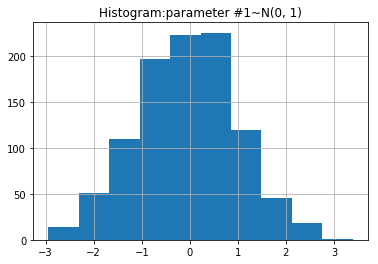

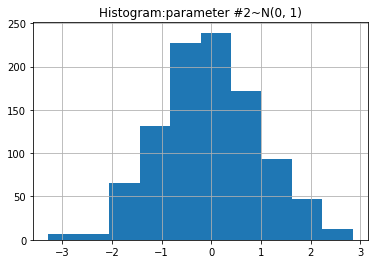

In [3]:
# Plot the distribution of the variables in the standard normal space
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1~N(0, 1)')
plt.hist(x.samples[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2~N(0, 1)')
plt.hist(x.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

Transform the standard normal random variables to:
- Lognormal(1,2)
- Gamma(2,1)

In [4]:
z_ucorr = Nataf(samples=x, marginal_name=['Lognormal', 'Gamma'], marginal_params=[[1, 2], [2, 1]])

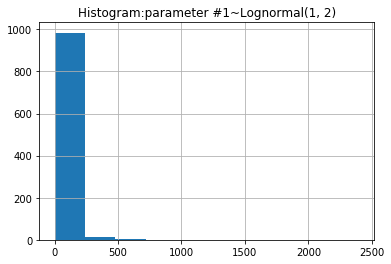

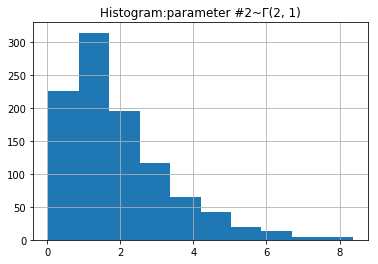

In [5]:
# Plot the distribution of the variables in the basic space
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1~Lognormal(1, 2)')
plt.hist(z_ucorr.samples_ng[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2~Γ(2, 1)')
plt.hist(z_ucorr.samples_ng[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

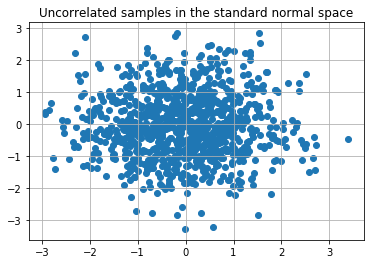

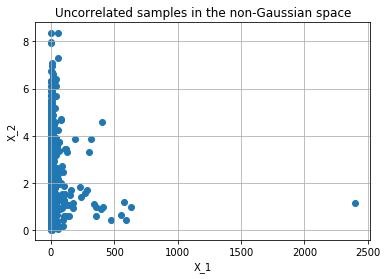

In [6]:
plt.figure()
plt.title('Uncorrelated samples in the standard normal space')
plt.scatter(x.samples[:, 0], x.samples[:, 1])
plt.grid(True)

   
plt.figure()
plt.title('Uncorrelated samples in the non-Gaussian space')
plt.scatter(z_ucorr.samples_ng[:, 0], z_ucorr.samples_ng[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()   

Correlation matrix in the standard normal space
[[ 1.   0.9]
 [ 0.9  1. ]]
Correlating standard normal samples...
Correlation matrix in the transformed space
[[ 1.          0.34287907]
 [ 0.34287907  1.        ]]


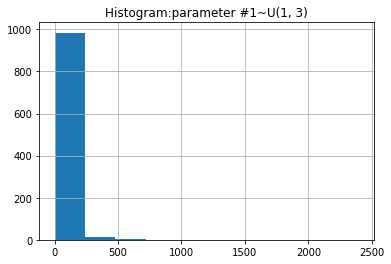

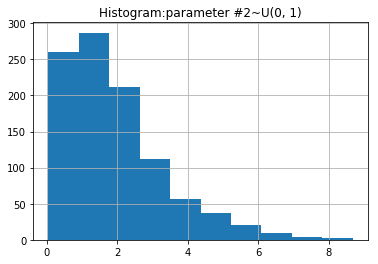

In [7]:
# Define the Gaussian correlation matrix of the random variables
Rho_G = np.array([[1.0, 0.9], [0.9, 1.0]])
print('Correlation matrix in the standard normal space')
print(Rho_G)

x_corr = Correlate(samples=x, corr_norm=Rho_G)
z = Nataf(samples=x_corr, corr_norm=Rho_G, marginal_name=['Lognormal', 'Gamma'], marginal_params=[[1, 2], [2, 1]])

print('Correlation matrix in the transformed space')
print(z.corr)


# Plot the distribution of the variables in the basic space
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1~U(1, 3)')
plt.hist(z.samples_ng[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2~U(0, 1)')
plt.hist(z.samples_ng[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()


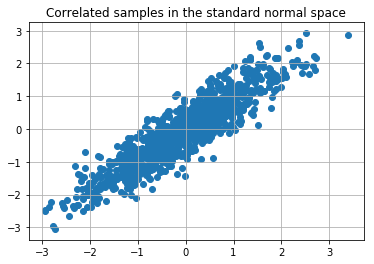

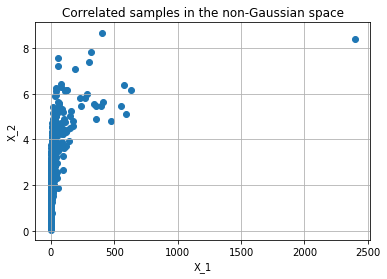

In [8]:
plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(x_corr.samples_corr[:, 0], x_corr.samples_corr[:, 1])
plt.grid(True)

   
plt.figure()
plt.title('Correlated samples in the non-Gaussian space')
plt.scatter(z.samples_ng[:, 0], z.samples_ng[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()   

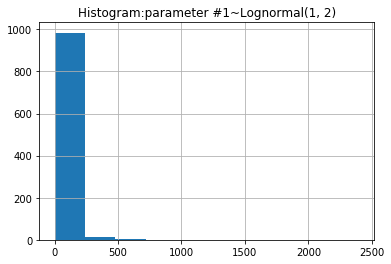

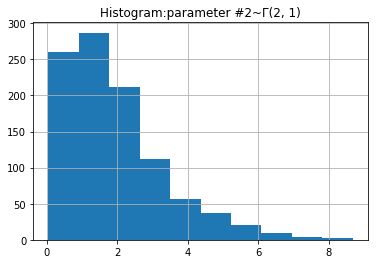

In [9]:
# Plot the distribution of the variables in the basic space
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1~Lognormal(1, 2)')
plt.hist(z.samples_ng[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2~Γ(2, 1)')
plt.hist(z.samples_ng[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

Define the samples as an array

In [10]:
# Given the samples in an array
x0 = np.random.multivariate_normal(np.zeros((2)), Rho_G, 1000)

In [11]:
z1 = Nataf(samples=x0, corr_norm=Rho_G, marginal_name=['Lognormal', 'Gamma'], marginal_params=[[1, 2], [2, 1]])

[[ 1.          0.34287907]
 [ 0.34287907  1.        ]]


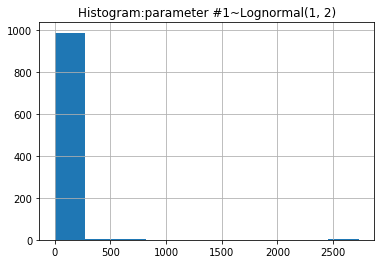

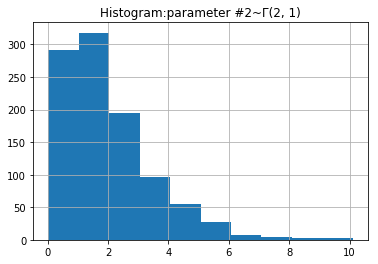

In [12]:
print(z1.corr)

# Plot the distribution of the variables in the basic space
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1~Lognormal(1, 2)')
plt.hist(z1.samples_ng[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2~Γ(2, 1)')
plt.hist(z1.samples_ng[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

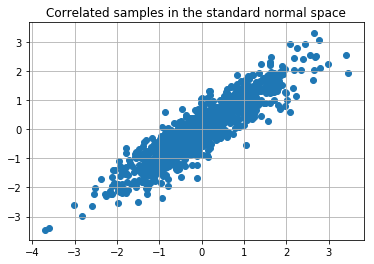

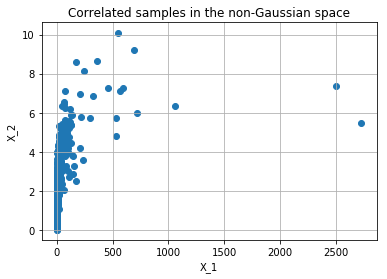

In [13]:
plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(x0[:, 0], x0[:, 1])
plt.grid(True)

   
plt.figure()
plt.title('Correlated samples in the non-Gaussian space')
plt.scatter(z1.samples_ng[:, 0], z1.samples_ng[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()   